# *Assignment #7*

## **[CSCI 581](https://www.ecst.csuchico.edu/~bjuliano/csci581/)**, Spring 2022

Jayaa Emekar

# One-versus-Many: Predicting passenger survival on the *Titanic* using decision trees

**Note:** The dataset is from the [Vanderbilt Biostatistics Datasets](https://hbiostat.org/data/).

## Overview

Having worked with the *Titanic* dataset using logistic regression and naive Bayes to predict the survivability of passengers on the *Titanic*, it is time to try out decision trees on this dataset.

Using scikit-learn and the [`titanic.csv`](https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv) dataset, you will

1.   Develop a [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) classifier.
2.   Develop a [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) classifier. For this classifier, be sure to find an optimal forest size (*i.e.* value for the `n_estimators` parameter).
3.   Compare the performance of the two classifiers when predicting whether a passenger will survive or not. Explain which of the two classifiers demonstrates the better performance and why you believe that is the case.



## Data

You will be using the same [`titanic.csv`](https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv) dataset we used in Assignments #3 and #4.

The file [`titanic.csv`](https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv) contains the details of the 1309 passengers on board and importantly, will reveal whether they survived or not.
The dataset file details include:

*   `pclass`: passenger class; proxy for socio-economic status (1st ~ upper, 2nd ~ middle, 3rd ~ lower)
*   `survived`: survival status (0=No, 1=Yes)
*   `name`: passenger name
*   `sex`: passenger sex (male, female)
*   `age`: passenger age in years (fractional if age is less than 1; if age is estimated, it is in the form xx.5)
*   `sibsp`: number of siblings/spouses aboard (includes step-siblings; mistresses and fiances ignored)
*   `parch`: number of parents/children aboard (parent only considers mother or father; child includes stepchildren)
*   `ticket`: ticket number
*   `fare`: passenger fare (in pre-1970 British pounds)
*   `cabin`: cabin number
*   `embarked`: port of embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)
*   `boat`: lifeboat number (if passenger boarded one)
*   `body`: body identification number
*   `home.dest`: passenger home/destination


## Required components of your submission 

Your *Google Colab* Jupyter notebook must include:

1.   all pertinent *exploratory data analysis* (EDA) code, visualizations, and justifications (you can reuse, perhaps with minimal modification, the work you did in your earlier Assignments);
2.   explanations/justifications for all model selection decisions;
3.   all pertinent model diagnostics, including metrics and visualizations; and
4.   your summary and conclusions pertaining to how the two models compare against each other.

Be sure to check out or review the *Assignments/Projects* section of our [*Blackboard*](https://learn.csuchico.edu/) course page for details regarding expectations, requirements, and the [*Jupyter Notebook Rubric*](https://www.ecst.csuchico.edu/~bjuliano/Teaching/rubric-jupyter-notebook.pdf) that will be used to evaluate Jupyter notebook submissions.



# Solution

## Download and load data
For easier development (and grading), the data will be downloaded direectly from the link provided into the colab session, and will then be loaded into a Pandas dataframe for ease of interface and minpulation.

All depndencies are contained within this cell

In [1]:
''' all depndencies are contained within this cell '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import display
import matplotlib.patches as mpatches
# from sklearn import linear_model
# from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

Download and load-in our dataset

In [2]:
''' download and load-in our dataset '''
# load in the dataset into a dataframe
titanicDF = pd.read_csv('https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv')

### Observation

The command to download the dataset from the given URL will not save if the file already exists. Thus, it won't overwrite any changes that may have been made.

## Basic data inspection
These wrapper functions facilitate basic data inspection capabilities such as:
1. shape of dataframe (or the number of rows and columns)
2. show the top 20 rows to see the data at a glance
3. show each columns datatype
4. show number of null values per column
5. visulize the number of null values in each column

Basic data inspection functions

Below function prints the numebr of columns and rows in the given dataframe df

In [3]:
''' basic data inspection functions '''
def showBasicInfo(df):
    ''' prints the numebr of columns and rows in the given dataframe df '''
    display(df.info())
    display(df.describe())

showBasicInfo(titanicDF)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


None

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Print the top 20 rows of a given dataframe df

In [4]:
def showTopTwentyRows(df):
    ''' prints the top 20 rows of a given dataframe df '''
    display(df.head(20))
    print("")

showTopTwentyRows(titanicDF)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


Print the datatype of each column in a given dataframe df

In [5]:
def showDatatypeOfEachColumn(df):
    ''' prints the datatype of each column in a given dataframe df'''
    print("The datatype of each column:")
    for i in df.columns:
        print(f"\tColumn [{i:{' '}{'<'}{15}}] has type of [{type(df[i][0])}]")   
    print("")


showDatatypeOfEachColumn(titanicDF)

The datatype of each column:
	Column [pclass         ] has type of [<class 'numpy.int64'>]
	Column [survived       ] has type of [<class 'numpy.int64'>]
	Column [name           ] has type of [<class 'str'>]
	Column [sex            ] has type of [<class 'str'>]
	Column [age            ] has type of [<class 'numpy.float64'>]
	Column [sibsp          ] has type of [<class 'numpy.int64'>]
	Column [parch          ] has type of [<class 'numpy.int64'>]
	Column [ticket         ] has type of [<class 'str'>]
	Column [fare           ] has type of [<class 'numpy.float64'>]
	Column [cabin          ] has type of [<class 'str'>]
	Column [embarked       ] has type of [<class 'str'>]
	Column [boat           ] has type of [<class 'str'>]
	Column [body           ] has type of [<class 'numpy.float64'>]
	Column [home.dest      ] has type of [<class 'str'>]



Prints the number of null values in each column, sorted by number of null values

In [6]:
def showNullDataPerColumn(df):
    ''' prints the number of null values in each column, sorted by number of null values '''

    # print the number of null values in each columns
    tempDict = {}
    for i in df.columns:
        tempDict[i] = (df[i].isnull().sum(), (df[i].isnull().sum()/len(df[i]))*100)
    
    # sort by value
    tempDict = dict(sorted(tempDict.items(), key=lambda item: item[1]))
    print("Number of null values in each columns:")

    for k,v in tempDict.items():
        print(f"\tColumn [{k:{' '}{'<'}{15}}] has [{v[0]}] null values",
              f"(or is {v[1]:{3.3}}% null)")
    
    print("")


showNullDataPerColumn(titanicDF)

Number of null values in each columns:
	Column [pclass         ] has [0] null values (or is 0.0% null)
	Column [survived       ] has [0] null values (or is 0.0% null)
	Column [name           ] has [0] null values (or is 0.0% null)
	Column [sex            ] has [0] null values (or is 0.0% null)
	Column [sibsp          ] has [0] null values (or is 0.0% null)
	Column [parch          ] has [0] null values (or is 0.0% null)
	Column [ticket         ] has [0] null values (or is 0.0% null)
	Column [fare           ] has [1] null values (or is 0.0764% null)
	Column [embarked       ] has [2] null values (or is 0.153% null)
	Column [age            ] has [263] null values (or is 20.1% null)
	Column [home.dest      ] has [564] null values (or is 43.1% null)
	Column [boat           ] has [823] null values (or is 62.9% null)
	Column [cabin          ] has [1014] null values (or is 77.5% null)
	Column [body           ] has [1188] null values (or is 90.8% null)



Returns a list of labels which are percentToDrop or more null values

In [7]:
def getPercentOfNullValsPerColumn(df, percentToDrop=0):
    ''' returns a list of labels which are percentToDrop or more null values '''

    hits = []
    for i in df.columns:
        nan_percent = (df[i].isnull().sum()/len(df[i]))*100
        print(f"column {i:{15}} is {nan_percent:{3.3}}% null values")
        if nan_percent > percentToDrop:
            hits.append(i)
    
    return hits

Prints the number of unique values in each column

In [8]:
def showNumOfUniqueValuesPerColumn(df):
    ''' prints the number of unique values in each column'''
    
    
    tempDict = {}
    for i in df.columns:
        tempDict[i] = df[i].nunique()

    # sort by value
    tempDict = dict(sorted(tempDict.items(), key=lambda item: item[1]))
    print("Number of unique values in each columns:")

    for k,v in tempDict.items():
        print(f"\tColumn [{k:{' '}{'<'}{15}}] has [{v}] unique values,"
        , f"and is of type {type(df[k][0])}")

    print("")

showNumOfUniqueValuesPerColumn(titanicDF)

Number of unique values in each columns:
	Column [survived       ] has [2] unique values, and is of type <class 'numpy.int64'>
	Column [sex            ] has [2] unique values, and is of type <class 'str'>
	Column [pclass         ] has [3] unique values, and is of type <class 'numpy.int64'>
	Column [embarked       ] has [3] unique values, and is of type <class 'str'>
	Column [sibsp          ] has [7] unique values, and is of type <class 'numpy.int64'>
	Column [parch          ] has [8] unique values, and is of type <class 'numpy.int64'>
	Column [boat           ] has [27] unique values, and is of type <class 'str'>
	Column [age            ] has [98] unique values, and is of type <class 'numpy.float64'>
	Column [body           ] has [121] unique values, and is of type <class 'numpy.float64'>
	Column [cabin          ] has [186] unique values, and is of type <class 'str'>
	Column [fare           ] has [281] unique values, and is of type <class 'numpy.float64'>
	Column [home.dest      ] has [

Generates a plot with the null values per column in a given dataframe df

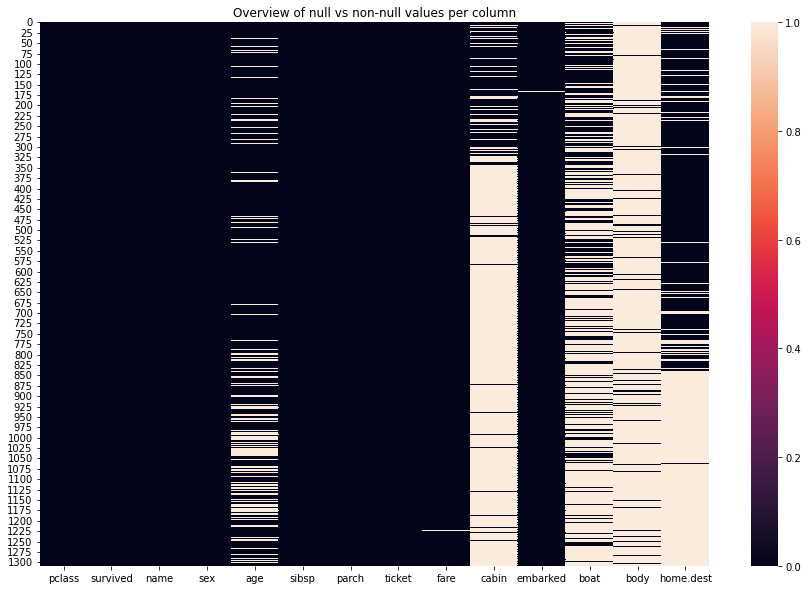

In [9]:
def visualizeNullDataPerColumn(df):
    ''' generates a plot with the null values per column in a given dataframe df '''
    
    # plot a heatmap of null values per column
    plt.figure(figsize=(15.0,10.0))
    sns.heatmap(df.isnull())
    plt.title("Overview of null vs non-null values per column")
    plt.show()
    print("")

visualizeNullDataPerColumn(titanicDF)

Check duplicated values in a df based on a column

In [10]:
def checkDuplicatesBasedOnColumn(df, col):
    ''' check duplicated values in a df based on a column '''

    cols = df[col]
    print(f"showing duplicate values in column {col}")
    display(df[cols.isin(cols[cols.duplicated()])])

checkDuplicatesBasedOnColumn(titanicDF, 'name')


showing duplicate values in column name


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
725,3,1,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q,13,NaN,Ireland
726,3,0,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,NaN,NaN,Ireland
924,3,0,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN
925,3,0,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S,NaN,NaN,NaN


In [11]:
checkDuplicatesBasedOnColumn(titanicDF, 'ticket')


showing duplicate values in column ticket


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,3,0,"Yasbeck, Mr. Antoni",male,27.00,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.00,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN


In [12]:
checkDuplicatesBasedOnColumn(titanicDF, 'cabin')


showing duplicate values in column cabin


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [13]:
checkDuplicatesBasedOnColumn(titanicDF, 'boat')


showing duplicate values in column boat


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [14]:
checkDuplicatesBasedOnColumn(titanicDF, 'body')


showing duplicate values in column body


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [15]:
checkDuplicatesBasedOnColumn(titanicDF, 'home.dest')

showing duplicate values in column home.dest


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


### Observation
We can see that:
* We have 14 columns and 1309 row, or up to 14 data point about each of the 1309 passanger.
* Checking for possible columns to encode, we are looking for columns with a low number of catagories and not numerical. Here's the list from the output above:
	1. Column `sex` has 2 caagories, type `<class 'str'>`
	1. Column `embarked` has 3 caagories, type `<class 'str'>`
	1. Column `boat` has 27 caagories, type `<class 'str'>`
	1. Column `cabin` has 186 caagories, type `<class 'str'>`
	1. Column `home.dest` has 369 caagories, type `<class 'str'>`
	1. Column `ticket` has 929 caagories, type `<class 'str'>`
	1. Column `name` has 1307 caagories, type `<class 'str'>`

* Since out target column, `survived`, has 2 unique values: 0, or not survived, and 1, survived, we want to use logistic regression model.

* Checking for null values in each column, it may be best to remove columns with a high (>50%) number of null values to preserve the remaining rows. Here's a list:
	1. Column `fare` has 1 null values (or is 0.0764% null)
	1. Column `embarked` has 2 null values (or is 0.153% null)
	1. Column `age` has 263 null values (or is 20.1% null)
	1. Column `home.dest` has 564 null values (or is 43.1% null)
	1. Column `boat` has 823 null values (or is 62.9% null)
	1. Column `cabin` has 1014 null values (or is 77.5% null)
	1. Column `body` has 1188 null values (or is 90.8% null)

* Checking for duplicate values, we get:
    1. Two `name` values appear have duplicates `Connolly, Miss. Kate` and `Kelly, Mr. James`, as they each have the same value of `sex` as their duplicates. However, we can also see that they have different values for age, and ticket numbers. Therefore, and since names are not always unique by themselves, we will treat each as seperate individuals.
    1. `ticket` appears to be shared amongst people in the same cabin. And vice-versa for people in the same cabin.
    1. `cabin` has 27 unqiue values and is 62.9% null. Upon closer inspection, this column doesn't have actua duplicate rows.
    1. `boat` has 27 unqiue values and is 62.9% null. Upon closer inspection, this column doesn't have actua duplicate rows.
    1. `body` upon closer inspection, these seem to be found as duplicates as this column is >90% null. Thus, these are valid rows with no exact duplicate rows.
    1. `home.dest`, given that it has 369 unqiue, and upon closer inspection, these are valid rows with no exact duplicate rows.

* only 38.197% of passengers survived the titanc.

## Exploratory data analysis
This section provides with wrapper functions that can help us visualize the data with different types of plots such as:
1. distribution plots of unique values in a specific column
2. swarm plots of unique values in a specific column
3. count plots of each unique value in a specific column
4. an overview heatmap showing the correlation between numerical columns

In the second cell in this section, I left the `maxUniqueVals` limit open (unlimited) as it's cruicial to remain unbiased. For example, it probably is valid to assume the `name` columns has no correlation to the `survived` of each person, but that is only a valid approach once justifiable with data. (assuming I know nothing of the historical event of the TItanic sinking). As a result, this migth take longer to run.

**Exploratory data analysis**


This function generates a distirbution plot of unqiue values in a specified column label.

    @df: panadas dataframe containing the data
    @columnLabel: label of column to geenrate distribution of
    @maxUniqueVals: pass an integer greater than -1 to ignore the column if it
                    contains more unique values than the integer specified

In [16]:

def showDistribution(df, columnLabel, maxUniqueVals=-1):
    ''' 
    generates a distirbution plot of unqiue values in a specified column label.

    @df: panadas dataframe containing the data
    @columnLabel: label of column to geenrate distribution of
    @maxUniqueVals: pass an integer greater than -1 to ignore the column if it
                    contains more unique values than the integer specified
    '''

    # check if given column label exist in given dataframe
    if columnLabel not in df.columns:
        print("Given column label is not in given dataframe.",
              f"(got {columnLabel}, but dataframe contains {df.columns}.)",
              end="\n\n")
        return

    # check if we were told to ingnore columns with unique values over the maximum 
    # specified
    if maxUniqueVals is not -1:
        if len(titanicDF[f"{columnLabel}"].value_counts()) > maxUniqueVals:
            print(f"Plot of column {columnLabel} contains too many unique values.",
            "Skipping plotting per request.")
            return

    plt.figure(figsize=(18.0,12.0))
    plt.title(f"Ditribution of unique values in {columnLabel} column")
    sns.histplot(df[f'{columnLabel}'])
    plt.show()
    print("")



This function generates a swarm plot, useful to understand different catagories in a columns.

    @df: panadas dataframe containing the data
    @columnLabel: label of column to geenrate distribution of
    @maxUniqueVals: pass an integer greater than -1 to ignore the column if it
                    contains more unique values than the integer specified

In [17]:
def showSwarmPlot(df, columnLabel, maxUniqueVals=-1):
    ''' 
    generates a swarm plot, useful to understand different catagories in a columns.

    @df: panadas dataframe containing the data
    @columnLabel: label of column to geenrate distribution of
    @maxUniqueVals: pass an integer greater than -1 to ignore the column if it
                    contains more unique values than the integer specified
    '''

    # check if given column label exist in given dataframe
    if not all(_ in df.columns for _ in [columnLabel]):
        print("Given column label or hue is not in given dataframe.",
              f"(got {columnLabel}, but dataframe contains {df.columns}.)",
              end="\n\n")
        return

    # check if we were told to ingnore columns with unique values over the maximum 
    # specified
    if maxUniqueVals is not -1:
        if len(titanicDF[f"{columnLabel}"].value_counts()) > maxUniqueVals:
            print(f"Plot of column {columnLabel} contains too many unique values.",
            "Skipping plotting per request.")
            return

    plt.figure(figsize=(18.0,12.0))
    plt.title(f"Swarm plot of values in {columnLabel} column")
    sns.swarmplot(x=f'{columnLabel}', data=df)
    print("")


This function generates a count plot with a hue, useful to see how a column relates to another.

    @df: panadas dataframe containing the data
    @columnLabel: label of column to geenrate distribution of
    @maxUniqueVals: pass an integer greater than -1 to ignore the column if it
                    contains more unique values than the integer specified

In [18]:
def showCountPlotWithHue(df, columnLabel, hue, maxUniqueVals=-1):
    ''' 
    generates a count plot with a hue, useful to see how a column relates to another.

    @df: panadas dataframe containing the data
    @columnLabel: label of column to geenrate distribution of
    @maxUniqueVals: pass an integer greater than -1 to ignore the column if it
                    contains more unique values than the integer specified
    '''

    
    # check if given column label exist in given dataframe
    if not all(_ in df.columns for _ in [columnLabel, hue]):
        print("Given column label or hue is not in given dataframe.",
              f"(got {columnLabel} and {hue}, but dataframe contains {df.columns}.)",
              end="\n\n")
        return

    # check if we were told to ingnore columns with unique values over the maximum 
    # specified
    if maxUniqueVals is not -1:
        if len(titanicDF[f"{columnLabel}"].value_counts()) > maxUniqueVals:
            print(f"Plot of column {columnLabel} contains too many unique values.",
            "Skipping plotting per request.")
            return

    plt.figure(figsize=(18.0,12.0))
    plt.title(f"Count plot of values in {columnLabel} column with column {hue} as hue.")
    sns.countplot(x=f'{columnLabel}', hue=f'{hue}', data=df)
    plt.show()
    print("")

This function plot a correlation heat map of given dataframe

In [19]:
def showCorrelationHeatMap(df):
    ''' plot a correlation heat map of given dataframe. '''

    f, ax = plt.subplots(figsize=(11,11))
    sns.heatmap(df.corr(), annot=True)
    plt.show()

This function plot a box plot to correlate two columns

In [20]:
def showBoxPlotofTwoCols(df, x, y):
    ''' plot a box plot to correlate two columns '''

    plt.subplots(figsize=(11,11))
    sns.boxplot(x=x, y=y,
                  data=df,
                  showfliers=True, 
                  showmeans=True,
                  meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                        "markersize":"10"}).set_title(f'Distribution of {x} per {y}')
    plt.show()

### Note

---


The below cell was ran for my own analysis to ensure everything is visualized and covered. However, this will take a very long time to run, so it's commented our and I've picked the highlights in the following cells.

In [21]:
''' invoke data analysis visualization per-data cleaning functions '''
'''
# for each column, show a swarmplot, a distribution plot, and 
# a count plot with respect to the survived column
for col in titanicDF.columns:
    try:
        showSwarmPlot(titanicDF, col)
    except:
        print(f"Unable to generate a swarm plot for column {col} since it",
              " contains invalid catagorial value(s).")

    showDistribution(titanicDF, col)
    showCountPlotWithHue(titanicDF, col, 'survived')

# for each column, show box plots of it per every other column individually
for x in titanicDF.columns.values:
    for y in titanicDF.columns.values:
        if x is not y:
            try:
                showBoxPlotofTwoCols(titanicDF, x, y)
                plt.show()
            except:
                print(f"failed to generate a boxplot of {x} per {y} since neither column is numerical")

showCorrelationHeatMap(titanicDF)
'''

'\n# for each column, show a swarmplot, a distribution plot, and \n# a count plot with respect to the survived column\nfor col in titanicDF.columns:\n    try:\n        showSwarmPlot(titanicDF, col)\n    except:\n        print(f"Unable to generate a swarm plot for column {col} since it",\n              " contains invalid catagorial value(s).")\n\n    showDistribution(titanicDF, col)\n    showCountPlotWithHue(titanicDF, col, \'survived\')\n\n# for each column, show box plots of it per every other column individually\nfor x in titanicDF.columns.values:\n    for y in titanicDF.columns.values:\n        if x is not y:\n            try:\n                showBoxPlotofTwoCols(titanicDF, x, y)\n                plt.show()\n            except:\n                print(f"failed to generate a boxplot of {x} per {y} since neither column is numerical")\n\nshowCorrelationHeatMap(titanicDF)\n'

Visualize the correlation matrix of all numerical columns

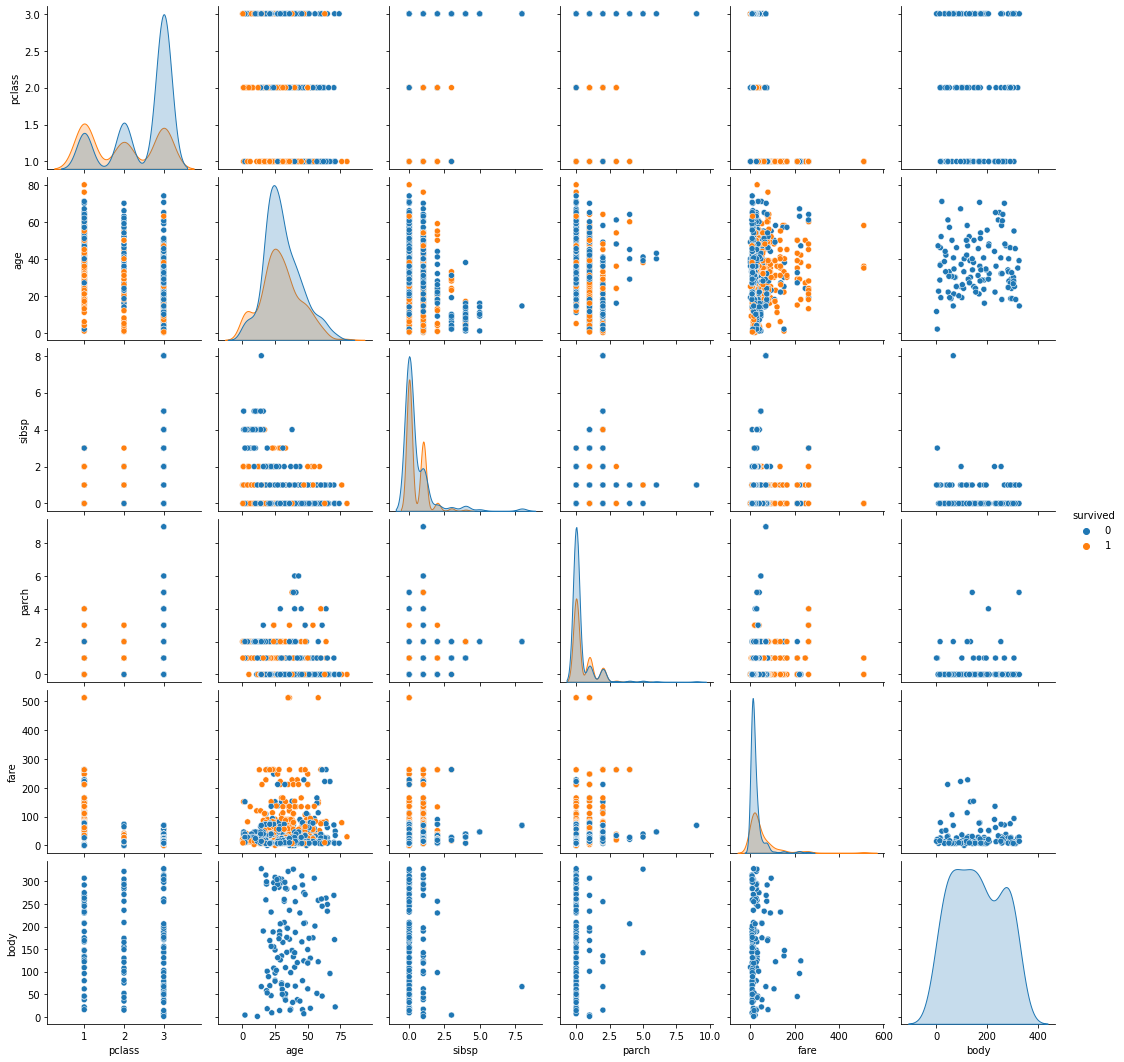

In [22]:
''' visualize the correlation matrix of all numerical columns '''
sns.pairplot(titanicDF, hue='survived')
plt.show()
print("")

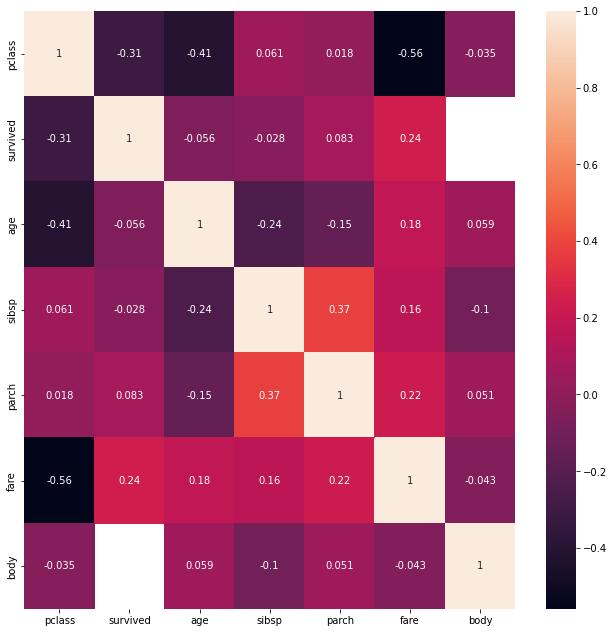

In [23]:
''' visualize the correlation matrix of all numerical columns '''
showCorrelationHeatMap(titanicDF)
plt.show()
print("")

### Observation
Out of all numerical columns, the `fare` and `pclass` appear to be the two most correlated columns to the `survived` column. However, we will need to revisit this once we have completed the data processing (including encoding non-numerical columns)

Inspect the distribution of each column with 100 or less unique values

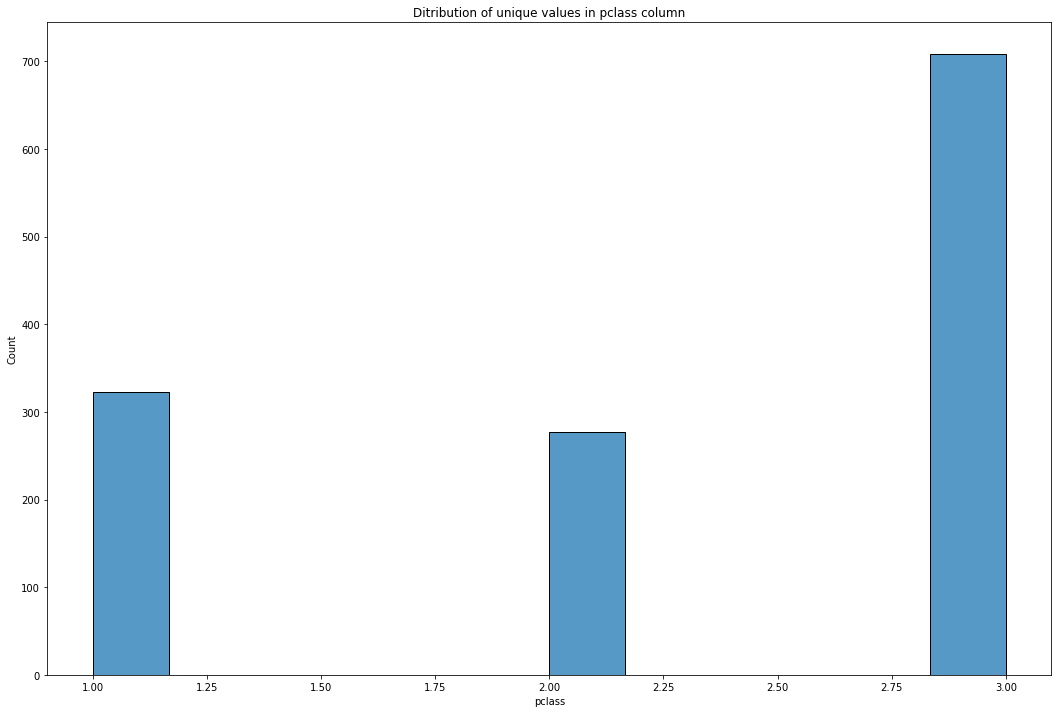

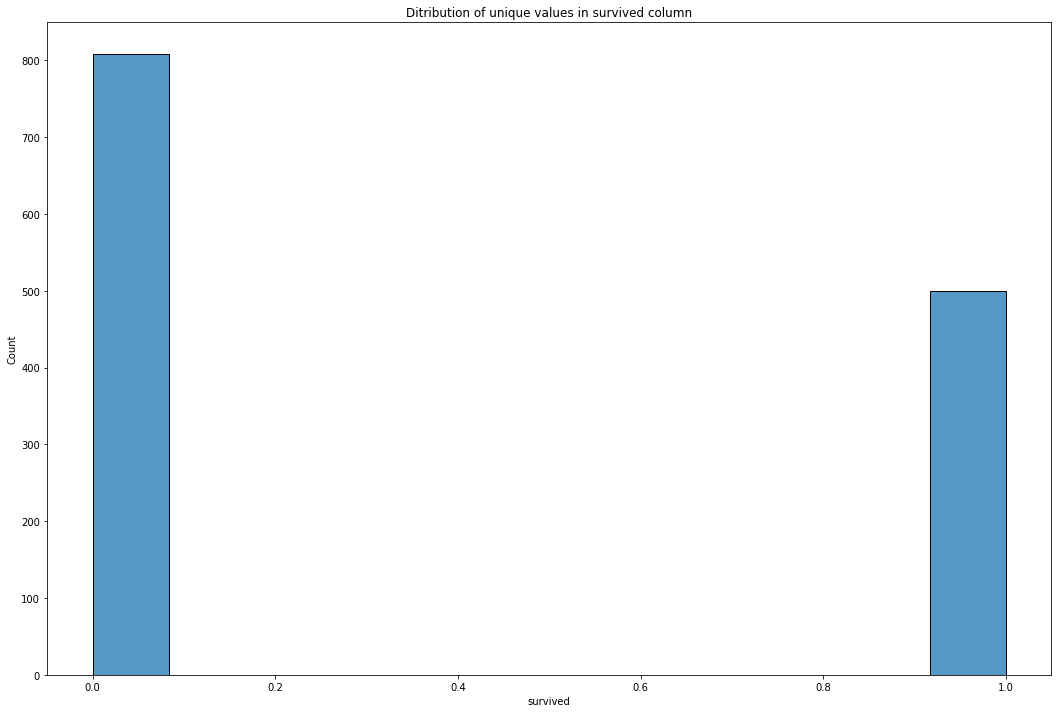


Plot of column name contains too many unique values. Skipping plotting per request.


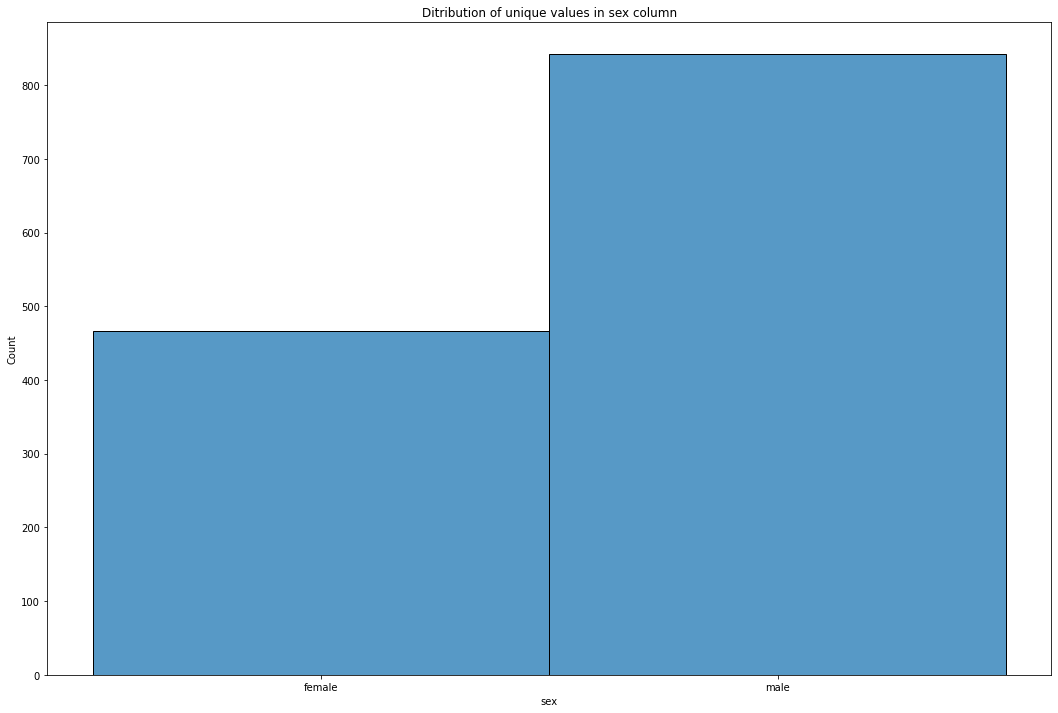

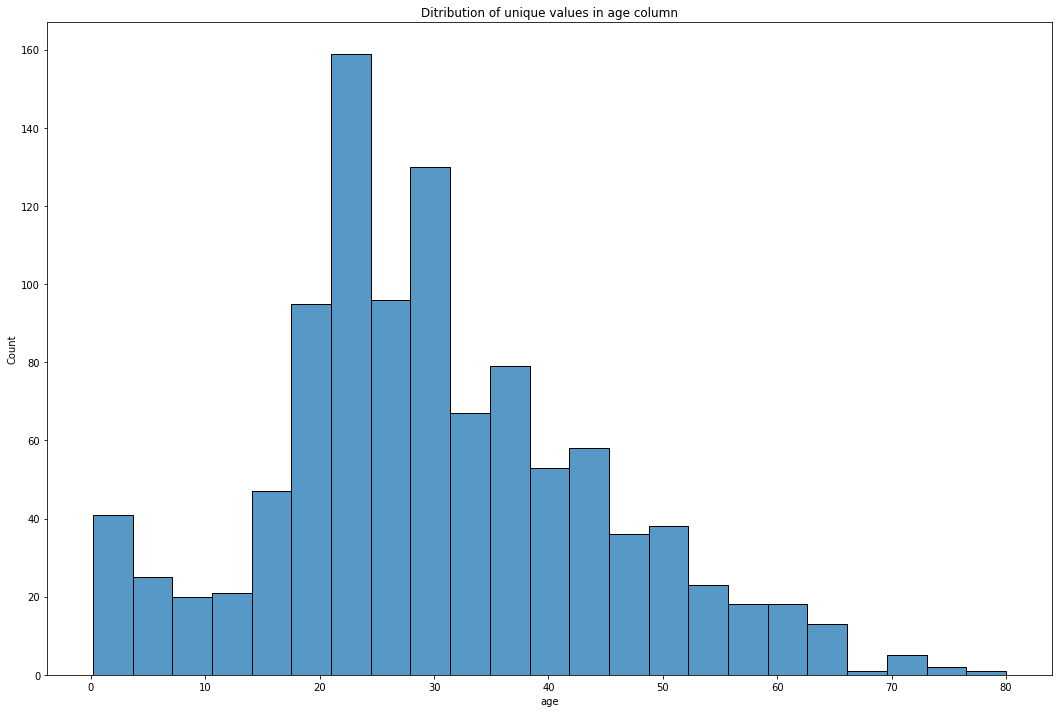

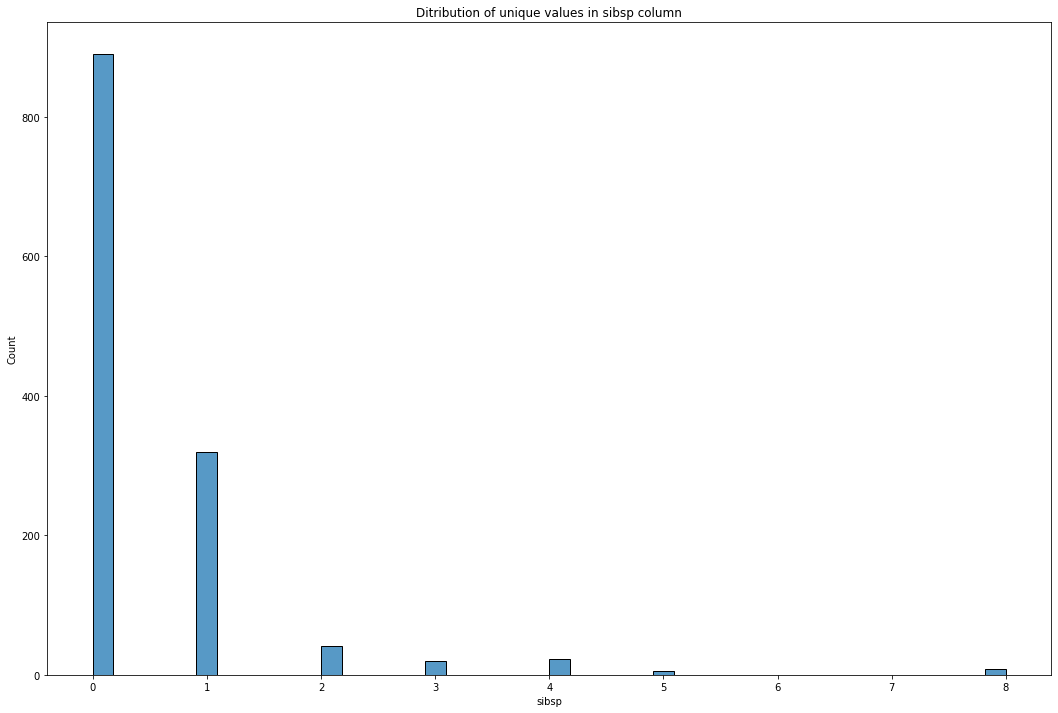

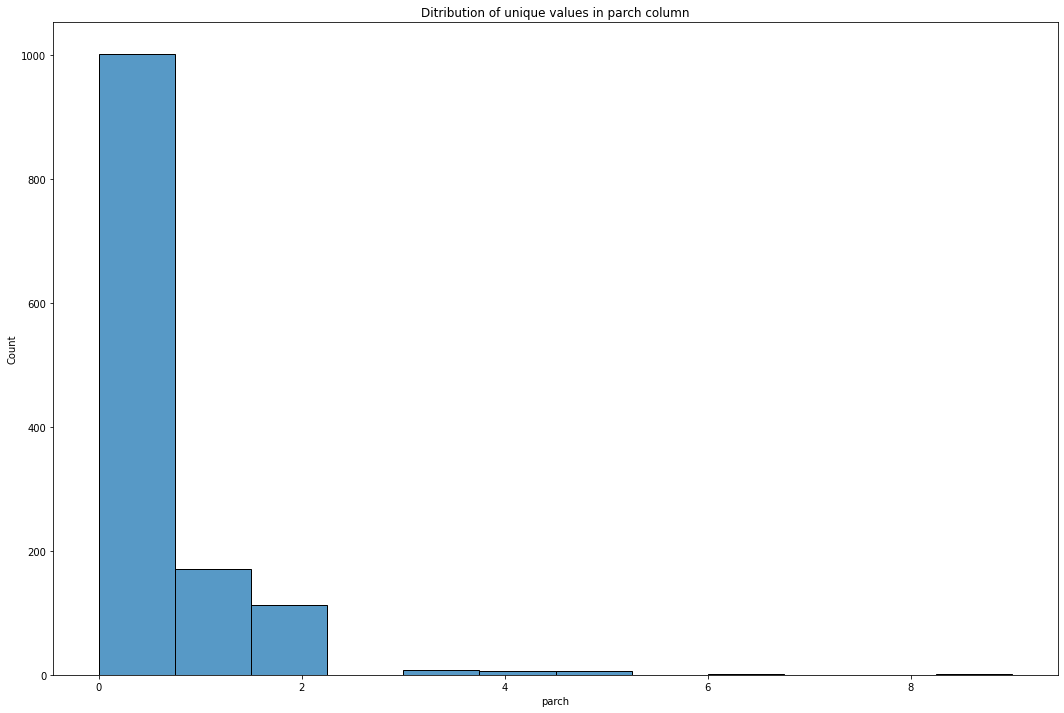


Plot of column ticket contains too many unique values. Skipping plotting per request.
Plot of column fare contains too many unique values. Skipping plotting per request.
Plot of column cabin contains too many unique values. Skipping plotting per request.


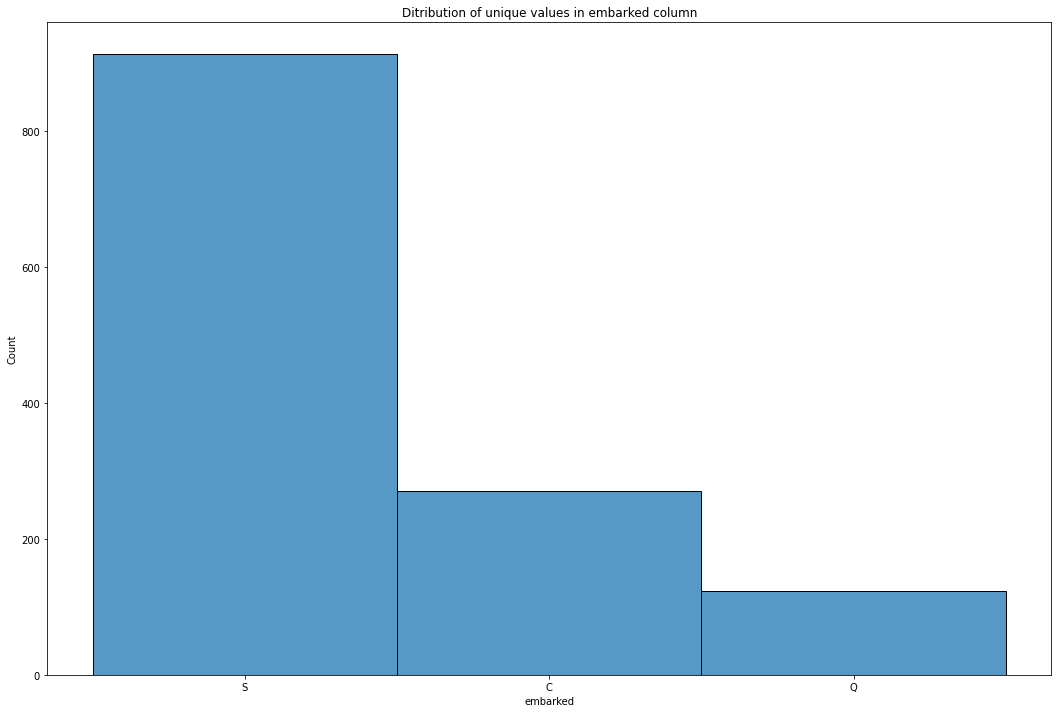

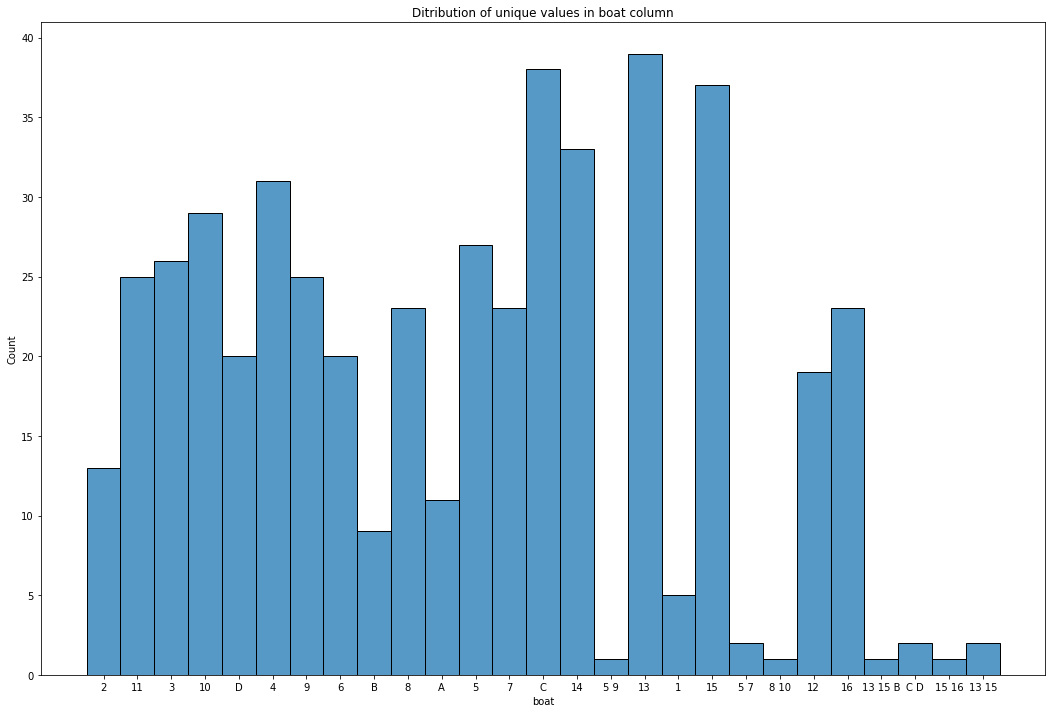


Plot of column body contains too many unique values. Skipping plotting per request.
Plot of column home.dest contains too many unique values. Skipping plotting per request.


In [24]:
''' inspect the distribution of each column with 100 or less unique values '''
maxCatagories = 101
for col in titanicDF.columns:
    showDistribution(titanicDF, col, maxCatagories)

### Observation
From he above cell output, we see the following:
* distribution of `pclass` column shows that the majority of passangers where in the lower class, about or more than the first and second class combined. Recall from our basic data inspection that this column notains no null values.
* distribution of `survivied` column shows that more people did not survive than those who survived. Recall that from our basic inspection of the data, we saw that this column contains no null values, and that only 38.1% of the passangers survived.
* `name`: 
as it's irrelevent and too sparse with respect to the target class `survived`. However, it's 0% null, and we should inspect it closley to see if we could extrapolate anything that may be useful for us.

* `body`: as 90% of its values are null. We could have possible extrapolated any `survived` missing data points from this class, but survived has no missing data points. So it's of no use to us.
* `cabin`: `boat` are also mostly null values (77.5% null, and 62.9% null respectivley). Instead of removing that many rows from the full dataset, or filling into those null values with default values and skew the model bias, it's best to drop those columns as well from ur dataset.
* `age`: this column is 20.1% null. We should inspect it closely and see if we can extrapolate some info in.

## Data extapolation
Before we give up on any missing data, let's try to extrapolate those missing values from the available data points.

For example, we notices that we have a single row missing a value for `fare` column. If the corrosponding `pclass` value exist, we might be able to apprximate their fare from that, based on other available data rows that have values for both `fare` and `pclass`.

**Data extrapolation functions**

findRowsWithValueInCol function returns the a list of the row indices that have the specified values in the specified column. Value defaults to null.

In [25]:
''' data extrapolation functions '''

def findRowsWithValueInCol(df, col, value=None):
    ''' returns the a list of the row indices that have the specified values in the
    specified column. Value defaults to null `Nan`.'''

    numOfMatches = 0
    matchingRows = []
    
    # see if we have any matching rows
    if value is None:
        numOfMatches = len(df[pd.isnull(df[f'{col}'])])
    else:
        numOfMatches = len(df[df[f'{col}'] == value])

    # did we find any?
    if numOfMatches < 1:
        print(f"no matching rows found for {value} in {col}")
    else:
        if value is None:
            matchingRows = list(df[pd.isnull(df[f'{col}'])].index)
        else:
            matchingRows = list(df[df[f'{col}'] == value].index)

    return matchingRows

This function change a single specific value in dataframe df, where the value is under 
column colLebal, and in row rowIndex. That value will be change to newValue

In [26]:
def changeASingleValue(df, colLabel, rowIndex, newValue):
    ''' change a single specific value in dataframe df, where the value is under 
    column colLebal, and in row rowIndex. THat value will be change to newValue.
    '''

    df.loc[rowIndex, colLabel] = newValue

Perform data extrapolation for missing fare values

Make a copy of the original dataframe to avoide changing original data

In [27]:
# make a copy of the original dataframe to avoide changing original data
titanicDF_extrapolated = titanicDF.copy()

Plot age vs class to see if there's a correlation

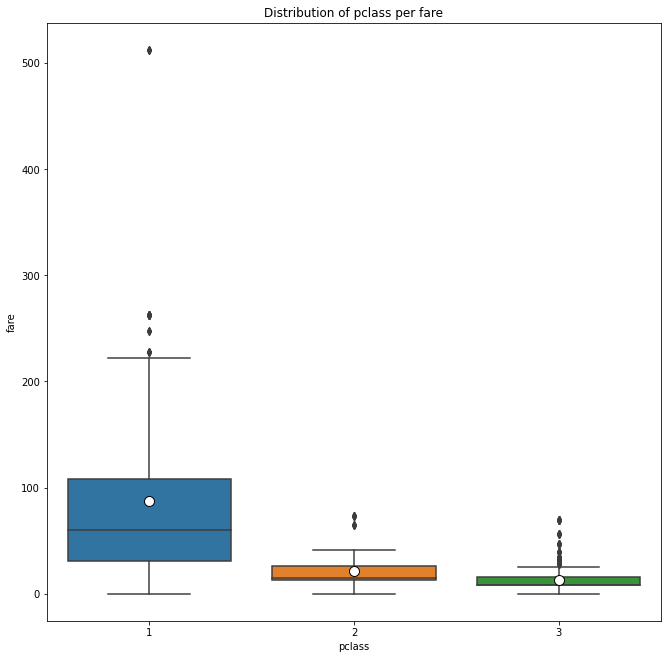

In [28]:
# plot age vs class to see if there's a correlation
showBoxPlotofTwoCols(titanicDF_extrapolated, 'pclass', 'fare')

Get the list of rows that match our criteria

In [29]:
missingValuesLabel = 'fare'
extrapolateFromLabel = 'pclass'

# get the list of rows that match our criteria
listOfMatchingRowsIndices = findRowsWithValueInCol(titanicDF, missingValuesLabel)
if len(listOfMatchingRowsIndices) > 0:
    print(f"Found {len(listOfMatchingRowsIndices)} matching rows")

Found 1 matching rows


Now get the average fare of the class in that row

In [30]:
for row in listOfMatchingRowsIndices:
    # now get the average fare of the class in that row
    pclass = titanicDF_extrapolated.loc[row, extrapolateFromLabel]
    avg_pclass_fare = titanicDF_extrapolated.groupby(extrapolateFromLabel)[missingValuesLabel].mean()
    # print(f"The average {missingValuesLabel} for all populated {missingValuesLabel},"
    #         f"values where '{extrapolateFromLabel} == {pclass}' is",
    #         avg_pclass_fare.values[2], end='\n\n')

    # inject the extrapolated value into our missing fare value
    changeASingleValue(titanicDF_extrapolated, 
                       missingValuesLabel, 
                       row, 
                       avg_pclass_fare.values[2])

    # show row before and after
    # print(f"row {row} before:")
    # display(titanicDF.iloc[[row]])
    # print(f"row {row} after:")
    # display(titanicDF_extrapolated.iloc[[row]])

print('Done filling in null values.' )

Done filling in null values.


**Investigate possible extrapolation from name column**

In [31]:
''' investigate possible extrapolation from name column '''

titanicDF_extrapolated2 = titanicDF_extrapolated.copy()

listOfNames = titanicDF_extrapolated2['name'].tolist()
# display(listOfNames)  # <-- uncomment to see the full list of names line by line

# notice upon an closer inspection that most if not all names have a title
# let's see how many unique titles can we extract from the names list
listOfUniqueTitles = []

for name in listOfNames:
    tempStr = name[name.index(','):]    # remove all chars until the first comma
    titleStr = tempStr.split(' ')[1]    # get title
    
    if titleStr not in listOfUniqueTitles:
        listOfUniqueTitles.append(titleStr)

As the print statement below shows us, there's potential for adding a new column
extrapolated from the name's column which maybe of better use to train a model 
with target column of survived


In [32]:

# redo the same for loop, but now create a full list titles that corrospond to each name
listOfTitles = []

for name in listOfNames:
    tempStr = name[name.index(','):]    # remove all chars until the first comma
    titleStr = tempStr.split(' ')[1]    # get title

    listOfTitles.append(titleStr)

# print(f"We now have a list of {len(listOfTitles)} titles populated in order",
#       f"compared to the originally extract list of {len(listOfNames)} names.")

# now add those as a new column call title to our dataset
titanicDF_extrapolated2['title'] = listOfTitles

# inspect our work
# titanicDF_extrapolated2.head(30)

print('Done filling in null values.' )
# looks good. moving on!

Done filling in null values.


**Perform data extrapolation for missing age values**

Make a copy of the lastest copy of the dataframe to avoide changing it

In [33]:
# make a copy of the lastest copy of the dataframe to avoide changing it
titanicDF_extrapolated3 = titanicDF_extrapolated2.copy()


Plot age vs class to see if there's a correlation

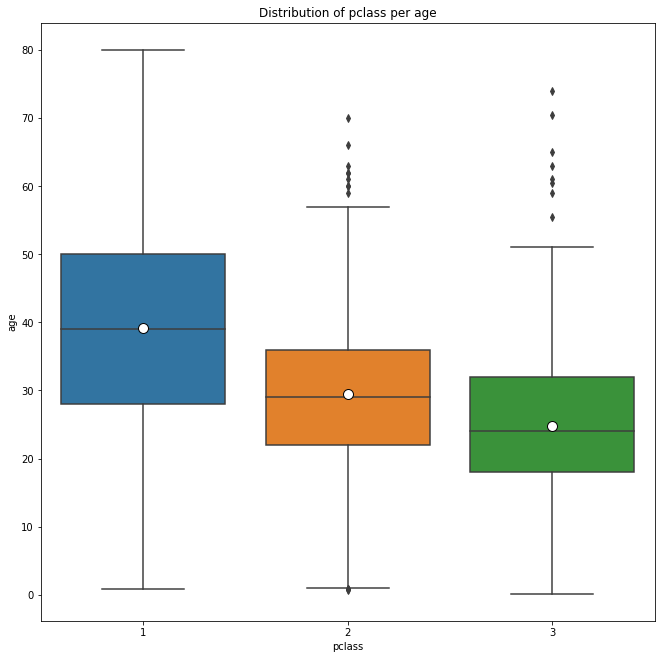

In [34]:

# plot age vs class to see if there's a correlation
showBoxPlotofTwoCols(titanicDF_extrapolated3, 'pclass', 'age')

# there seem to be some correlation, where the older you are, 
# the more likley you will be in a higher class (lower number pclass)

There seem to be some correlation, where the older you are, the more likley you will be in a higher class (lower number pclass)

Get the list of rows that match our criteria

In [35]:
missingValuesLabel = 'age'
extrapolateFromLabel = 'pclass'

# get the list of rows that match our criteria
listOfMatchingRowsIndices = findRowsWithValueInCol(titanicDF_extrapolated3, missingValuesLabel)
if len(listOfMatchingRowsIndices) > 0:
    print(f"Found {len(listOfMatchingRowsIndices)} matching rows")

Found 263 matching rows


In [36]:
for row in listOfMatchingRowsIndices:
    # now get the average fare of the class in that row
    pclass = titanicDF_extrapolated3.loc[row, extrapolateFromLabel]
    avg_pclass_fare = titanicDF_extrapolated3.groupby(extrapolateFromLabel)[missingValuesLabel].mean()[pclass]
    
    # uncommented to reduce output, but results were:
    #   'pclass == 1' is 39.15992957746479
    #   'pclass == 2' is 29.506704980842912
    #   'pclass == 3' is 24.81636726546906

    # print(f"The average {missingValuesLabel} for all populated {missingValuesLabel},"
    #         f"values where '{extrapolateFromLabel} == {pclass}' is",
    #         avg_pclass_fare, end='\n\n')

    # inject the extrapolated value into our missing fare value
    changeASingleValue(titanicDF_extrapolated3, 
                       missingValuesLabel, 
                       row, 
                       avg_pclass_fare)

    # Uncomment code below to see all replacements
    # show row before and after
    # print(f"row {row} before:")
    # display(titanicDF.iloc[[row]])
    # print(f"row {row} after:")
    # display(titanicDF_extrapolated.iloc[[row]])

print('Done filling in null values.' )
# looks good. moving on!

Done filling in null values.


### Observation
Upon closer inspection of some of the potential columns mentioned in the previous obsevation, we found the following:
1. `fare`: We filled in the single missing value in the `fare` column with the average `fare` value of other data points with the same `pclass` value. That is, the missing fare value belongs to someone in `pclass == 3` (or lower class). We can now use this column without having to drop that one row with the missing value.

2. we noticed that the names column is too spares, but we were able to consalidated it in a new column, `title`, which contains the title of each passenger as mentioned in their name (e.g., Mr., Mrs, Ms., ...etc). We can now drop that column and use the extrapolted column.

3. `Age` was ~20% null. It's now 0% null. We took the mean age of the corrosponding row with a null age, and filled it in. 

## Data cleaning
Now that we have plots and information about the dataset from the previous sections, and we have filled in the null values where feasible and logical, we can now begin cleaning our data based on the findings so far about the dataset.

Data cleaning may include operations such as filling in an appropriate default value for null values, or dropping the rows with a null values in a specific column.

**Basic data cleaning and wrangling**

This function replace all null datapoints with a specific value.

    @df: datframe to inspect
    @fillValue: values to fill nan data points with. Defaults to zero:int.
    @labelsToClean: list of labels to clean. Default to all labels.

    @returns a cleaned dataframe where all null values are zeros.

In [37]:
def fillNanDPs(df, fillValue=0, columnsToClean=[]):
    '''
    replace all null datapoints with a specific value.

    @df: datframe to inspect
    @fillValue: values to fill nan data points with. Defaults to zero:int.
    @labelsToClean: list of labels to clean. Default to all labels.

    @returns a cleaned dataframe where all null values are zeros.
    '''

    if not columnsToClean:
        columnsToClean=df.columns

    cleanedDf = df.copy()   # create a copy so we don't change the original dataframe
    
    for col in columnsToClean:
        print(f"filling col {col}")
        cleanedDf[col].fillna(fillValue, inplace=True)
        
    return cleanedDf


This function drop rows containing null values, in a specific column or all column. 

    @df: datframe to inspect
    @labelsToClean: list of labels to clean. Default to all labels.
    @returns a cleaned dataframe where all null values are zeros.

In [38]:
def dropNanRows(df, columnsToClean=[]):
    '''
    drop rows containing null values, in a specific column or all column. 

    @df: datframe to inspect
    @labelsToClean: list of labels to clean. Default to all labels.

    @returns a cleaned dataframe where all null values are zeros.
    '''

    if not columnsToClean:
        cleanedDf = df.dropna(how='any',axis=0)
        print(f"Dropped {len(df.index)-len(cleanedDf)} rows based on all columns.")
        
    
    else:
        for col in columnsToClean:
            cleanedDf = df[~df[col].isnull()]

        print(f"Dropped {len(df.index)-len(cleanedDf.index)} rows",
                          f"based on given columns {columnsToClean}.")
        

    return cleanedDf


This function drop a list of comulmns from a given dataframe

In [39]:
def dropColumns(df, listOfColsToDrop):
    ''' drop a list of comulmns from a given dataframe '''

    newDF = df.copy()

    for i in range(len(listOfColsToDrop)):
        newDF.drop(listOfColsToDrop[i], axis=1, inplace=True)
        print(f"Dropped column {listOfColsToDrop[i]}")
    
    return newDF

**inspec our columns post extrapolation**

It shows number of unique values per column

In [40]:
showNumOfUniqueValuesPerColumn(titanicDF_extrapolated3)

Number of unique values in each columns:
	Column [survived       ] has [2] unique values, and is of type <class 'numpy.int64'>
	Column [sex            ] has [2] unique values, and is of type <class 'str'>
	Column [pclass         ] has [3] unique values, and is of type <class 'numpy.int64'>
	Column [embarked       ] has [3] unique values, and is of type <class 'str'>
	Column [sibsp          ] has [7] unique values, and is of type <class 'numpy.int64'>
	Column [parch          ] has [8] unique values, and is of type <class 'numpy.int64'>
	Column [title          ] has [18] unique values, and is of type <class 'str'>
	Column [boat           ] has [27] unique values, and is of type <class 'str'>
	Column [age            ] has [104] unique values, and is of type <class 'numpy.float64'>
	Column [body           ] has [121] unique values, and is of type <class 'numpy.float64'>
	Column [cabin          ] has [186] unique values, and is of type <class 'str'>
	Column [fare           ] has [282] uniqu

It shows Null Data Per Column

In [41]:
showNullDataPerColumn(titanicDF_extrapolated3)

Number of null values in each columns:
	Column [pclass         ] has [0] null values (or is 0.0% null)
	Column [survived       ] has [0] null values (or is 0.0% null)
	Column [name           ] has [0] null values (or is 0.0% null)
	Column [sex            ] has [0] null values (or is 0.0% null)
	Column [age            ] has [0] null values (or is 0.0% null)
	Column [sibsp          ] has [0] null values (or is 0.0% null)
	Column [parch          ] has [0] null values (or is 0.0% null)
	Column [ticket         ] has [0] null values (or is 0.0% null)
	Column [fare           ] has [0] null values (or is 0.0% null)
	Column [title          ] has [0] null values (or is 0.0% null)
	Column [embarked       ] has [2] null values (or is 0.153% null)
	Column [home.dest      ] has [564] null values (or is 43.1% null)
	Column [boat           ] has [823] null values (or is 62.9% null)
	Column [cabin          ] has [1014] null values (or is 77.5% null)
	Column [body           ] has [1188] null values (or 

**clean the following rows/columns basic data cleaning**

In [42]:
''' clean the following rows/columns basic data cleaning '''
# drop all rows with null values of the 'embarked column'
titanicDF_cleaned = dropNanRows(titanicDF_extrapolated3, ['embarked'])
titanicDF_cleaned2 = dropColumns(titanicDF_cleaned, ['body', 'cabin', 'boat', 'home.dest', 'ticket', 'name'])


Dropped 2 rows based on given columns ['embarked'].
Dropped column body
Dropped column cabin
Dropped column boat
Dropped column home.dest
Dropped column ticket
Dropped column name


**Inspect our data post cleaning**

Show number of unique values per column after data cleaning

In [43]:
showNumOfUniqueValuesPerColumn(titanicDF_cleaned2)

Number of unique values in each columns:
	Column [survived       ] has [2] unique values, and is of type <class 'numpy.int64'>
	Column [sex            ] has [2] unique values, and is of type <class 'str'>
	Column [pclass         ] has [3] unique values, and is of type <class 'numpy.int64'>
	Column [embarked       ] has [3] unique values, and is of type <class 'str'>
	Column [sibsp          ] has [7] unique values, and is of type <class 'numpy.int64'>
	Column [parch          ] has [8] unique values, and is of type <class 'numpy.int64'>
	Column [title          ] has [18] unique values, and is of type <class 'str'>
	Column [age            ] has [104] unique values, and is of type <class 'numpy.float64'>
	Column [fare           ] has [281] unique values, and is of type <class 'numpy.float64'>



Show null data per column after data cleaning

In [44]:
showNullDataPerColumn(titanicDF_cleaned2)

Number of null values in each columns:
	Column [pclass         ] has [0] null values (or is 0.0% null)
	Column [survived       ] has [0] null values (or is 0.0% null)
	Column [sex            ] has [0] null values (or is 0.0% null)
	Column [age            ] has [0] null values (or is 0.0% null)
	Column [sibsp          ] has [0] null values (or is 0.0% null)
	Column [parch          ] has [0] null values (or is 0.0% null)
	Column [fare           ] has [0] null values (or is 0.0% null)
	Column [embarked       ] has [0] null values (or is 0.0% null)
	Column [title          ] has [0] null values (or is 0.0% null)



Show basic info after data cleaning

In [45]:
showBasicInfo(titanicDF_cleaned2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1307 non-null   int64  
 1   survived  1307 non-null   int64  
 2   sex       1307 non-null   object 
 3   age       1307 non-null   float64
 4   sibsp     1307 non-null   int64  
 5   parch     1307 non-null   int64  
 6   fare      1307 non-null   float64
 7   embarked  1307 non-null   object 
 8   title     1307 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 134.4+ KB


None

,pclass,survived,age,sibsp,parch,fare
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,2.296863,0.381025,29.316617,0.499617,0.385616,33.208714
std,0.836942,0.485825,13.104568,1.042273,0.866092,51.749097
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,36.500000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


### Observation
We now have dataeframe, with 0 null values, and 1307 rows and 9 columns. Let's start encoding!

## Data wrangling
Now that we have cleaned our data, and we are one step closer to being able to use it in our ML model, we need to wrangle the data where needed.
Wrangling the data includes encoding the data (mapping the data from one format/datatype to another). This is important to allow us to train our logistic regression model with the data. For example, we can encode the `sex` column, which has the two unique sring values `male` and `female`, with the integer values `0` and `1` respectivley. In which case, in the `sex` column, any `male` data point will be replaced with the integer `0`, and a `1` in place of any data point of value `female`.

**Encode features to allow for manipulation**

This function return a list of column names (i.e., labels) with unique values less than a
    certian threshold.

    @df: dataframe to scan
    @maxUniqueVals: number of unqiue values threshold.
    @verbose: if True, prints more dtails on what's happening under the hood.
    returns a list of labels which has a number of unqiue values less than 
    maxUniqueVals.

In [46]:
# encoding features

def getListOfCatagorialLabels(df, maxUniqueVals=5, verbose=False):
    '''
    return a list of column names (i.e., labels) with unique values less than a
    certian threshold.

    @df: dataframe to scan
    @maxUniqueVals: number of unqiue values threshold.
    @verbose: if True, prints more dtails on what's happening under the hood.

    returns a list of labels which has a number of unqiue values less than 
    maxUniqueVals.
    '''
    
    colsToEncode = []
    for i in df.columns:
        if verbose:
            print(f"column {i:{11}} has {df[i].nunique():{3}} unqiue values")

        if df[i].nunique() < maxUniqueVals:
            if not np.issubdtype(df[i].dtype, np.number):
                if verbose:
                    print("found column {} with type {}".format(i, type(df[i][0])))
                colsToEncode.append((i, df[i].nunique()))

    print(f"Columns to encode with less than {maxUniqueVals} unique values:")

    for label in colsToEncode:
        print(f"\tLabel {label[0]} has the following unique values: {df[label[0]].unique()}")
    
    return colsToEncode

This function encode certian columns in a data frame with the given encoding map.

    @df: dataframe to encode
    @listOfColumnToEncode: lit of column names (i.e., labels) to encode
    @dictOfEncodingMap: dictionary containing the map of the encoding values
    @verbose: show snapshots pre-, and post- encoding.

    returns an encoded dataframe

In [47]:
def encodeFeatures(df, listOfColumnToEncode, dictOfEncodingMap, verbose=False):
    '''
    encode certian columns in a data frame with the given encoding map.

    @df: dataframe to encode
    @listOfColumnToEncode: lit of column names (i.e., labels) to encode
    @dictOfEncodingMap: dictionary containing the map of the encoding values
    @verbose: show snapshots pre-, and post- encoding.

    returns an encoded dataframe
    '''

    # encode each col
    for i in listOfColumnToEncode:
        col = i[0]
        numOfUnique = i[1]
        print(f"\nEncoding class {col} with {numOfUnique} catagories to:")
        print(f"{encoding_vals_dict[col].items()}")

    # get a snapshot before
    headPreEncoding = df.head(20)

    # encode
    dfEncoded = df.replace(encoding_vals_dict)

    # get a snapshot after
    headPostEncoding = dfEncoded.head(20)

    if verbose:
        # show snapshots
        print("before:")
        display(headPreEncoding)
        print("\n\nafter:")
        display(headPostEncoding)

    return dfEncoded

**Invoke feartures encoding**

In [48]:
''' invoke feartures encoding '''

labelsToEncode = getListOfCatagorialLabels(titanicDF_cleaned2, 20)

Columns to encode with less than 20 unique values:
	Label sex has the following unique values: ['female' 'male']
	Label embarked has the following unique values: ['S' 'C' 'Q']
	Label title has the following unique values: ['Miss.' 'Master.' 'Mr.' 'Mrs.' 'Col.' 'Mme.' 'Dr.' 'Major.' 'Capt.'
 'Lady.' 'Sir.' 'Mlle.' 'Dona.' 'Jonkheer.' 'the' 'Don.' 'Rev.' 'Ms.']


**Encode data**

In [49]:
''' encode data '''
# encoding features map based on preivous cell output
encoding_vals_dict = {"sex":        {"male": -1, "female": 1},
                      "embarked":   {"Q": 0, "S": 1, "C": 2},
                      "title":     {'Miss.': 0,
                                     'Master.': 1,
                                     'Mr.': 2,
                                     'Mrs.': 3,
                                     'Col.': 4,
                                     'Mme.': 5,
                                     'Dr.': 6,
                                     'Major.': 7,
                                     'Capt.': 8,
                                     'Lady.': 9,
                                     'Sir.': 10,
                                     'Mlle.': 11,
                                     'Dona.': 12,
                                     'Jonkheer.': 13,
                                     'the': 14,
                                     'Don.': 15,
                                     'Rev.': 16,
                                     'Ms.': 17,
                                     }
                      }

titanicDF_Encoded = encodeFeatures(titanicDF_cleaned2, 
                                   labelsToEncode, 
                                   encoding_vals_dict)


Encoding class sex with 2 catagories to:
dict_items([('male', -1), ('female', 1)])

Encoding class embarked with 3 catagories to:
dict_items([('Q', 0), ('S', 1), ('C', 2)])

Encoding class title with 18 catagories to:
dict_items([('Miss.', 0), ('Master.', 1), ('Mr.', 2), ('Mrs.', 3), ('Col.', 4), ('Mme.', 5), ('Dr.', 6), ('Major.', 7), ('Capt.', 8), ('Lady.', 9), ('Sir.', 10), ('Mlle.', 11), ('Dona.', 12), ('Jonkheer.', 13), ('the', 14), ('Don.', 15), ('Rev.', 16), ('Ms.', 17)])


**Inspect our data post excoding**

This shows number of unique values per column post encoding

In [50]:
showNumOfUniqueValuesPerColumn(titanicDF_Encoded)

Number of unique values in each columns:
	Column [survived       ] has [2] unique values, and is of type <class 'numpy.int64'>
	Column [sex            ] has [2] unique values, and is of type <class 'numpy.int64'>
	Column [pclass         ] has [3] unique values, and is of type <class 'numpy.int64'>
	Column [embarked       ] has [3] unique values, and is of type <class 'numpy.int64'>
	Column [sibsp          ] has [7] unique values, and is of type <class 'numpy.int64'>
	Column [parch          ] has [8] unique values, and is of type <class 'numpy.int64'>
	Column [title          ] has [18] unique values, and is of type <class 'numpy.int64'>
	Column [age            ] has [104] unique values, and is of type <class 'numpy.float64'>
	Column [fare           ] has [281] unique values, and is of type <class 'numpy.float64'>



This shows null data per column post encoding

In [51]:
showNullDataPerColumn(titanicDF_Encoded)

Number of null values in each columns:
	Column [pclass         ] has [0] null values (or is 0.0% null)
	Column [survived       ] has [0] null values (or is 0.0% null)
	Column [sex            ] has [0] null values (or is 0.0% null)
	Column [age            ] has [0] null values (or is 0.0% null)
	Column [sibsp          ] has [0] null values (or is 0.0% null)
	Column [parch          ] has [0] null values (or is 0.0% null)
	Column [fare           ] has [0] null values (or is 0.0% null)
	Column [embarked       ] has [0] null values (or is 0.0% null)
	Column [title          ] has [0] null values (or is 0.0% null)



This shows basic info post encoding

In [52]:

showBasicInfo(titanicDF_Encoded)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1307 non-null   int64  
 1   survived  1307 non-null   int64  
 2   sex       1307 non-null   int64  
 3   age       1307 non-null   float64
 4   sibsp     1307 non-null   int64  
 5   parch     1307 non-null   int64  
 6   fare      1307 non-null   float64
 7   embarked  1307 non-null   int64  
 8   title     1307 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 134.4 KB


None

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,2.296863,0.381025,-0.289977,29.316617,0.499617,0.385616,33.208714,1.112471,1.921194
std,0.836942,0.485825,0.957400,13.104568,1.042273,0.866092,51.749097,0.536898,1.825228
min,1.000000,0.000000,-1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,-1.000000,22.000000,0.000000,0.000000,7.895800,1.000000,2.000000
50%,3.000000,0.000000,-1.000000,26.000000,0.000000,0.000000,14.454200,1.000000,2.000000
75%,3.000000,1.000000,1.000000,36.500000,1.000000,0.000000,31.275000,1.000000,2.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,9.000000,512.329200,2.000000,17.000000


### Observation
We now have our dataset fully encoded with all numircal columns. Let's look at the correlation with `survived`.

## Finding the correlation
In this section, we use the data we cleaned and wrangled to see if we can find a strong correlation. This will help us determine which columns, if any, that need to be dropped to reduce any noise that may be given to the model, which would affect the overall accuracy of our model.

Visualize the correlation matrix of all numerical columns using pairplot

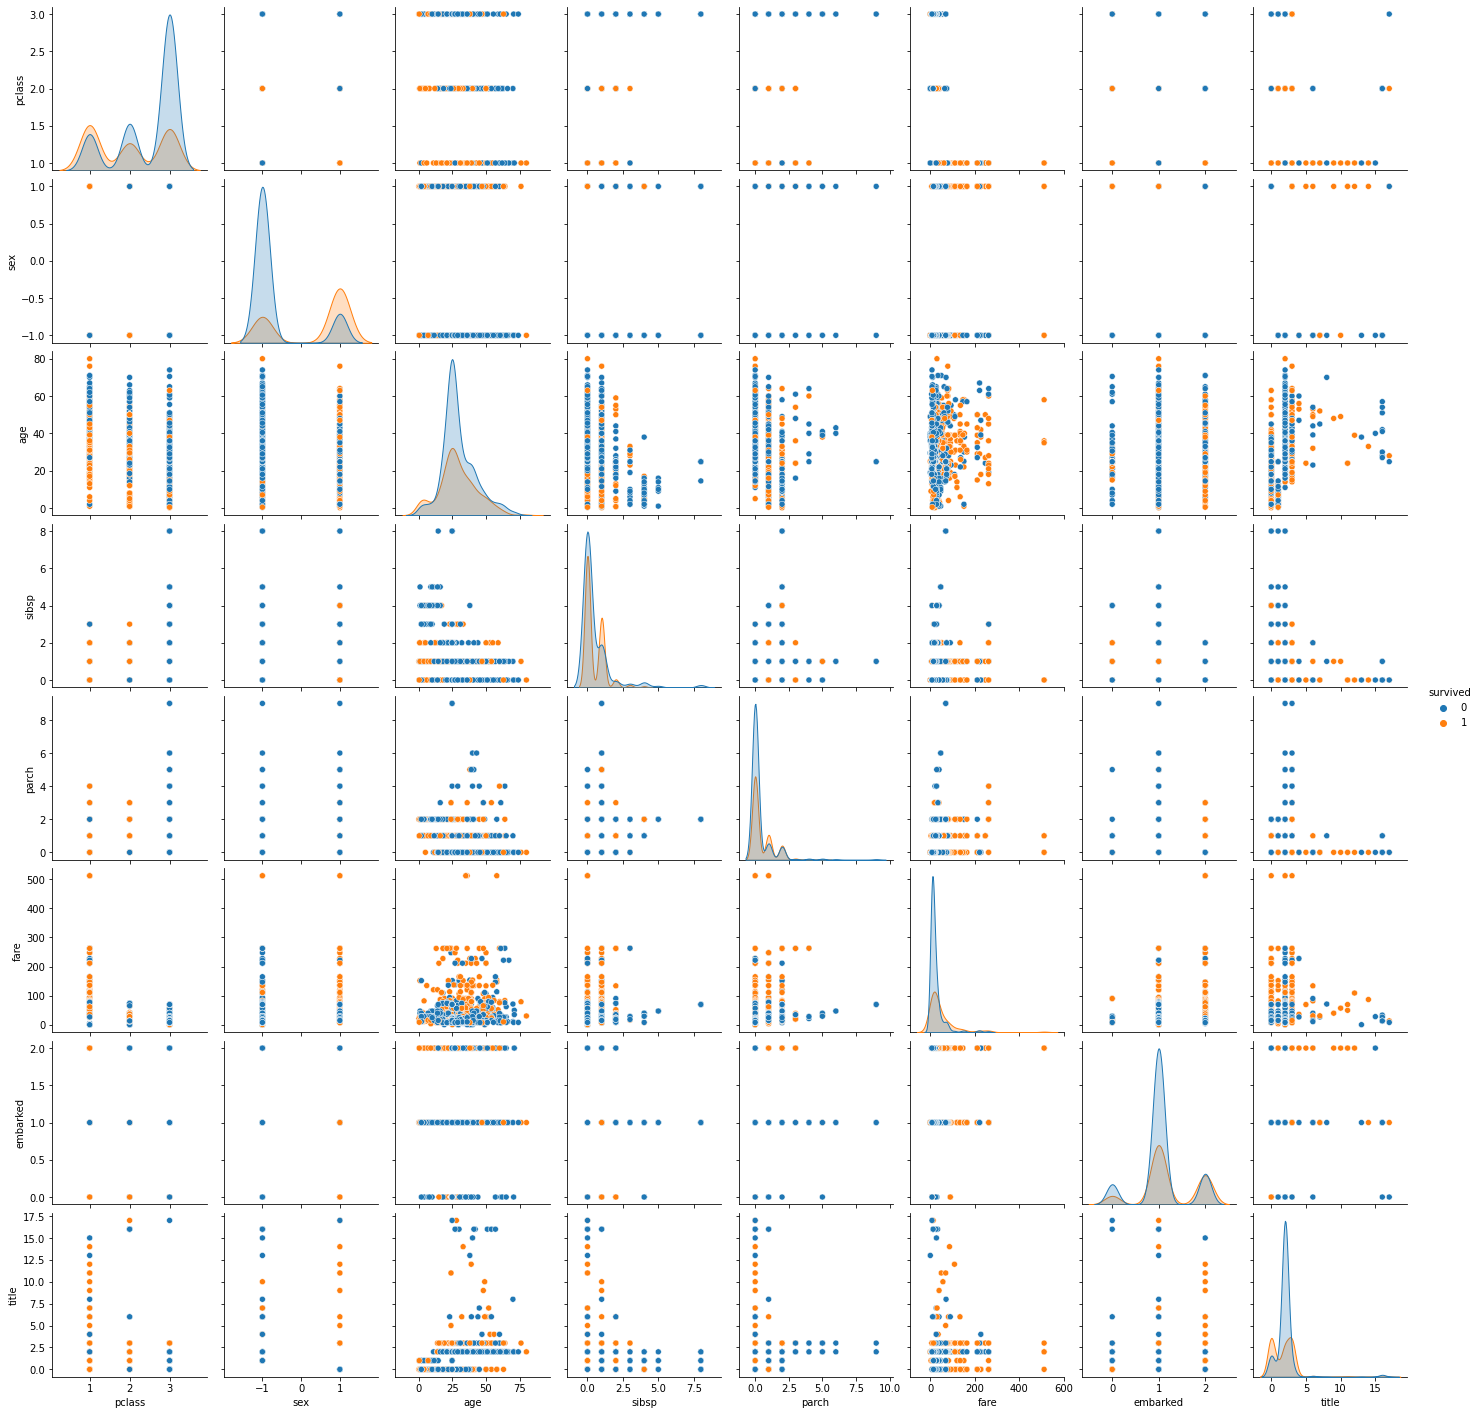

In [53]:
''' visualize the correlation matrix of all numerical columns '''

sns.pairplot(titanicDF_Encoded, hue='survived')
plt.show()
print("")

Visualize the correlation matrix of all numerical columns using CorrelationHeatMap

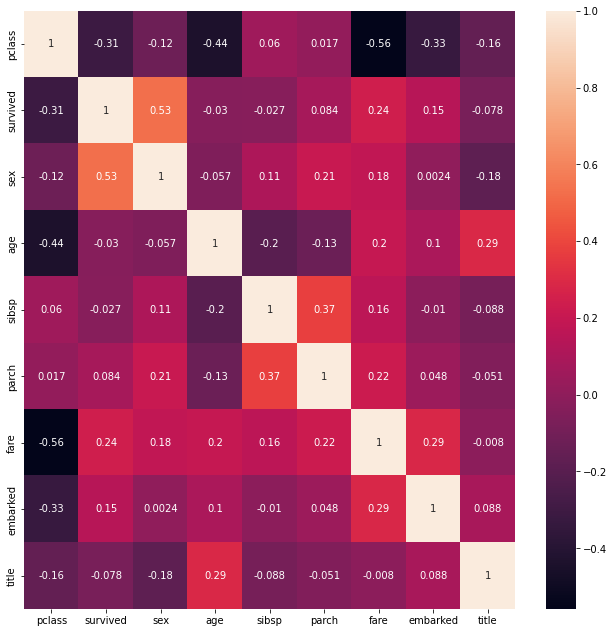

In [54]:
showCorrelationHeatMap(titanicDF_Encoded)
plt.show()
print("")


Inspect the box plot of all columns with 100 or less unique values, 
with respect to surviver column 

In [55]:
''' 
inspect the box plot of all columns with 100 or less unique values, 
with respect to surviver column 
'''
# maxCatagories = 100
# for col in titanicDF_Encoded.columns:
#     if col != 'survived':
#         showBoxPlotofTwoCols(titanicDF_Encoded, col, 'survived')
#         plt.show()


' \ninspect the box plot of all columns with 100 or less unique values, \nwith respect to surviver column \n'

Show correlation between each feature and target

['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'title']


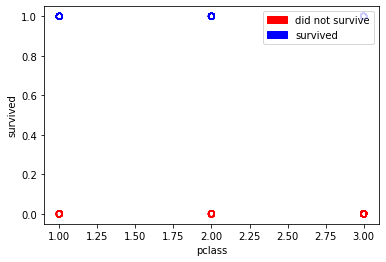

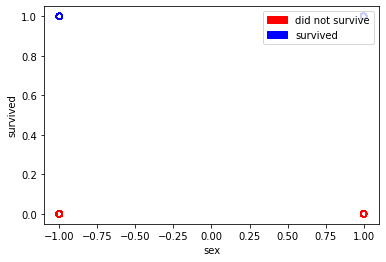

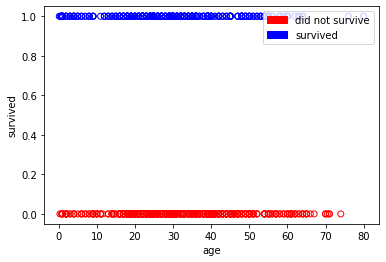

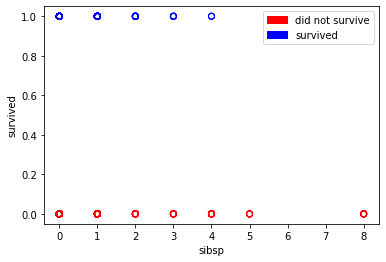

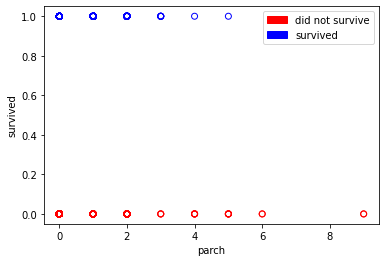

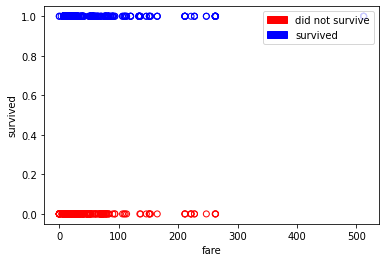

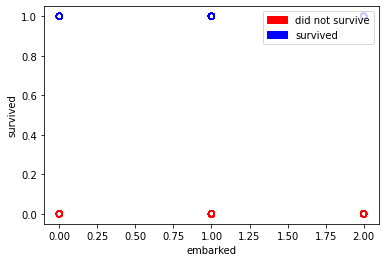

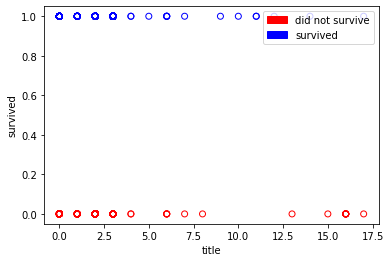

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


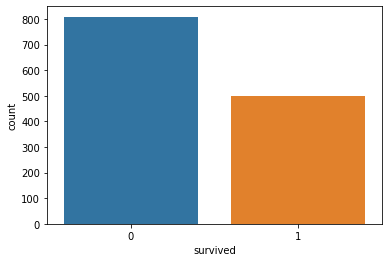

0    809
1    498
Name: survived, dtype: int64


<Figure size 432x288 with 0 Axes>

In [56]:
''' show correlation between each feature and target '''

featuresList = list(titanicDF_Encoded.columns)
featuresList.remove('survived')
print(featuresList)

for feature in featuresList:
    x = titanicDF_Encoded[feature]
    y = titanicDF_Encoded['survived']
    colors = {0:'red', 1:'blue'}

    plt.scatter(x,y,
                facecolors='none', # circles are not filled
                edgecolors=y.apply(lambda x: colors[x]),
                cmap=colors)

    plt.xlabel(feature)
    plt.ylabel("survived")

    red = mpatches.Patch(color='red',   label='did not survive')
    blue = mpatches.Patch(color='blue',  label='survived')

    plt.legend(handles=[red, blue], loc=1)
    plt.show()


# get count of survived vs did not survive
sns.countplot(titanicDF_Encoded['survived'])
plt.show()
plt.clf()

# print count of each value
print(titanicDF_Encoded['survived'].value_counts())

### Observation
Notice the strong correlation with our target column `survived` from the pair plot and the heatmap is in the following order:
1. `sex` = 53%
1. `pclass` = 31%
1. `fare` = 24%
1. `embarked` = 15%

We'll choose those for trainig our model. We'll drop the rest for simplicity. This is a great fork-point to experiment with and compare the results. All the tools to accomplish this are porvided in functions, simply call/skip them accordingly.

In [57]:
''' drop columns we won't use due to low correlation with survived '''
colsToKeep = ['sex', 'pclass', 'fare', 'embarked', 'survived']

for col in titanicDF_Encoded.columns:
    if col not in colsToKeep:
        titanicDF_Encoded = titanicDF_Encoded.drop(col, axis=1)
        print(f"dropped {col} column")

print("done dropping columns with low correlation to survived.")

dropped age column
dropped sibsp column
dropped parch column
dropped title column
done dropping columns with low correlation to survived.


## Dataset partitioning
Here we will split our fully processed dataset (cleaned and wrangled) into a training part, and a testing part.
We need to keep in mind that pour target class/column is `survived`. Thus, we should avoid having one partition biased. In other words, if our train or test dataset partition has only rows with a `survived` value of `0`, this may skew our model's prediction accuracy. 

In [58]:
''' test train split '''

def testTrainSplit(df, train_size, verbose=True):
    train_df, test_df = train_test_split(df, 
                                        train_size=train_size, 
                                        #  shuffle=False,
                                        random_state=99,       # for reprouducability
                                        stratify=titanicDF_Encoded[['survived']])

    if verbose:
        print(f"Allocated {train_size*100}% of the dataset to training, the rest is for testing.")

    return train_df, test_df

In [59]:
''' split feature classses from target classes '''

def splitFeaturesFromClasses(train_df, test_df):
    X_train = train_df.drop("survived", axis=1)
    Y_train = train_df["survived"]
    X_test = test_df.drop("survived", axis=1)
    Y_test = test_df["survived"]

    return X_train, Y_train, X_test, Y_test

### Observation
We are now ready to create, train, and test our model.

In [60]:
''' split data for both models '''
# get splitted dat and train model
train_df, test_df = testTrainSplit(titanicDF_Encoded, train_size=0.50, verbose=True)
X_train, Y_train, X_test, Y_test = splitFeaturesFromClasses(train_df, test_df)

Allocated 50.0% of the dataset to training, the rest is for testing.


## Part 1: Decision Tree classsifier

                 precision    recall  f1-score   support

Did not survive       0.81      0.83      0.82       405
       Survived       0.71      0.69      0.70       249

       accuracy                           0.78       654
      macro avg       0.76      0.76      0.76       654
   weighted avg       0.77      0.78      0.77       654



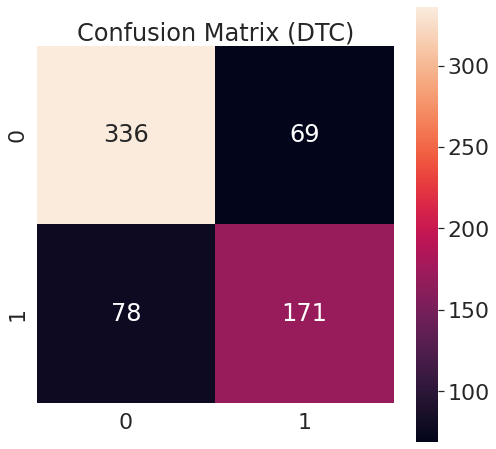

<Figure size 432x288 with 0 Axes>

In [61]:
''' build, train, and test a DTC model '''

# create model
classifier = DecisionTreeClassifier(random_state=0)

# train model
classifier.fit(X_train, Y_train)

# test model
Y_pred = classifier.predict(X_test)

# print classification report
print(classification_report(Y_test,
                            Y_pred,
                            target_names=['Did not survive', 'Survived']))

# plot confusion matrix
confMatrix = confusion_matrix(Y_test,
                              Y_pred)

df_cm = pd.DataFrame(confMatrix)

plt.figure(figsize=(8,8))
sns.set(font_scale=2)
sns.heatmap(df_cm, annot=True, square=True, fmt="d")
plt.title("Confusion Matrix (DTC)")
plt.show()
plt.clf()

A single decision tree model produced accuracy of 81% and the confusion metrix above.  The tree is visualized in below.

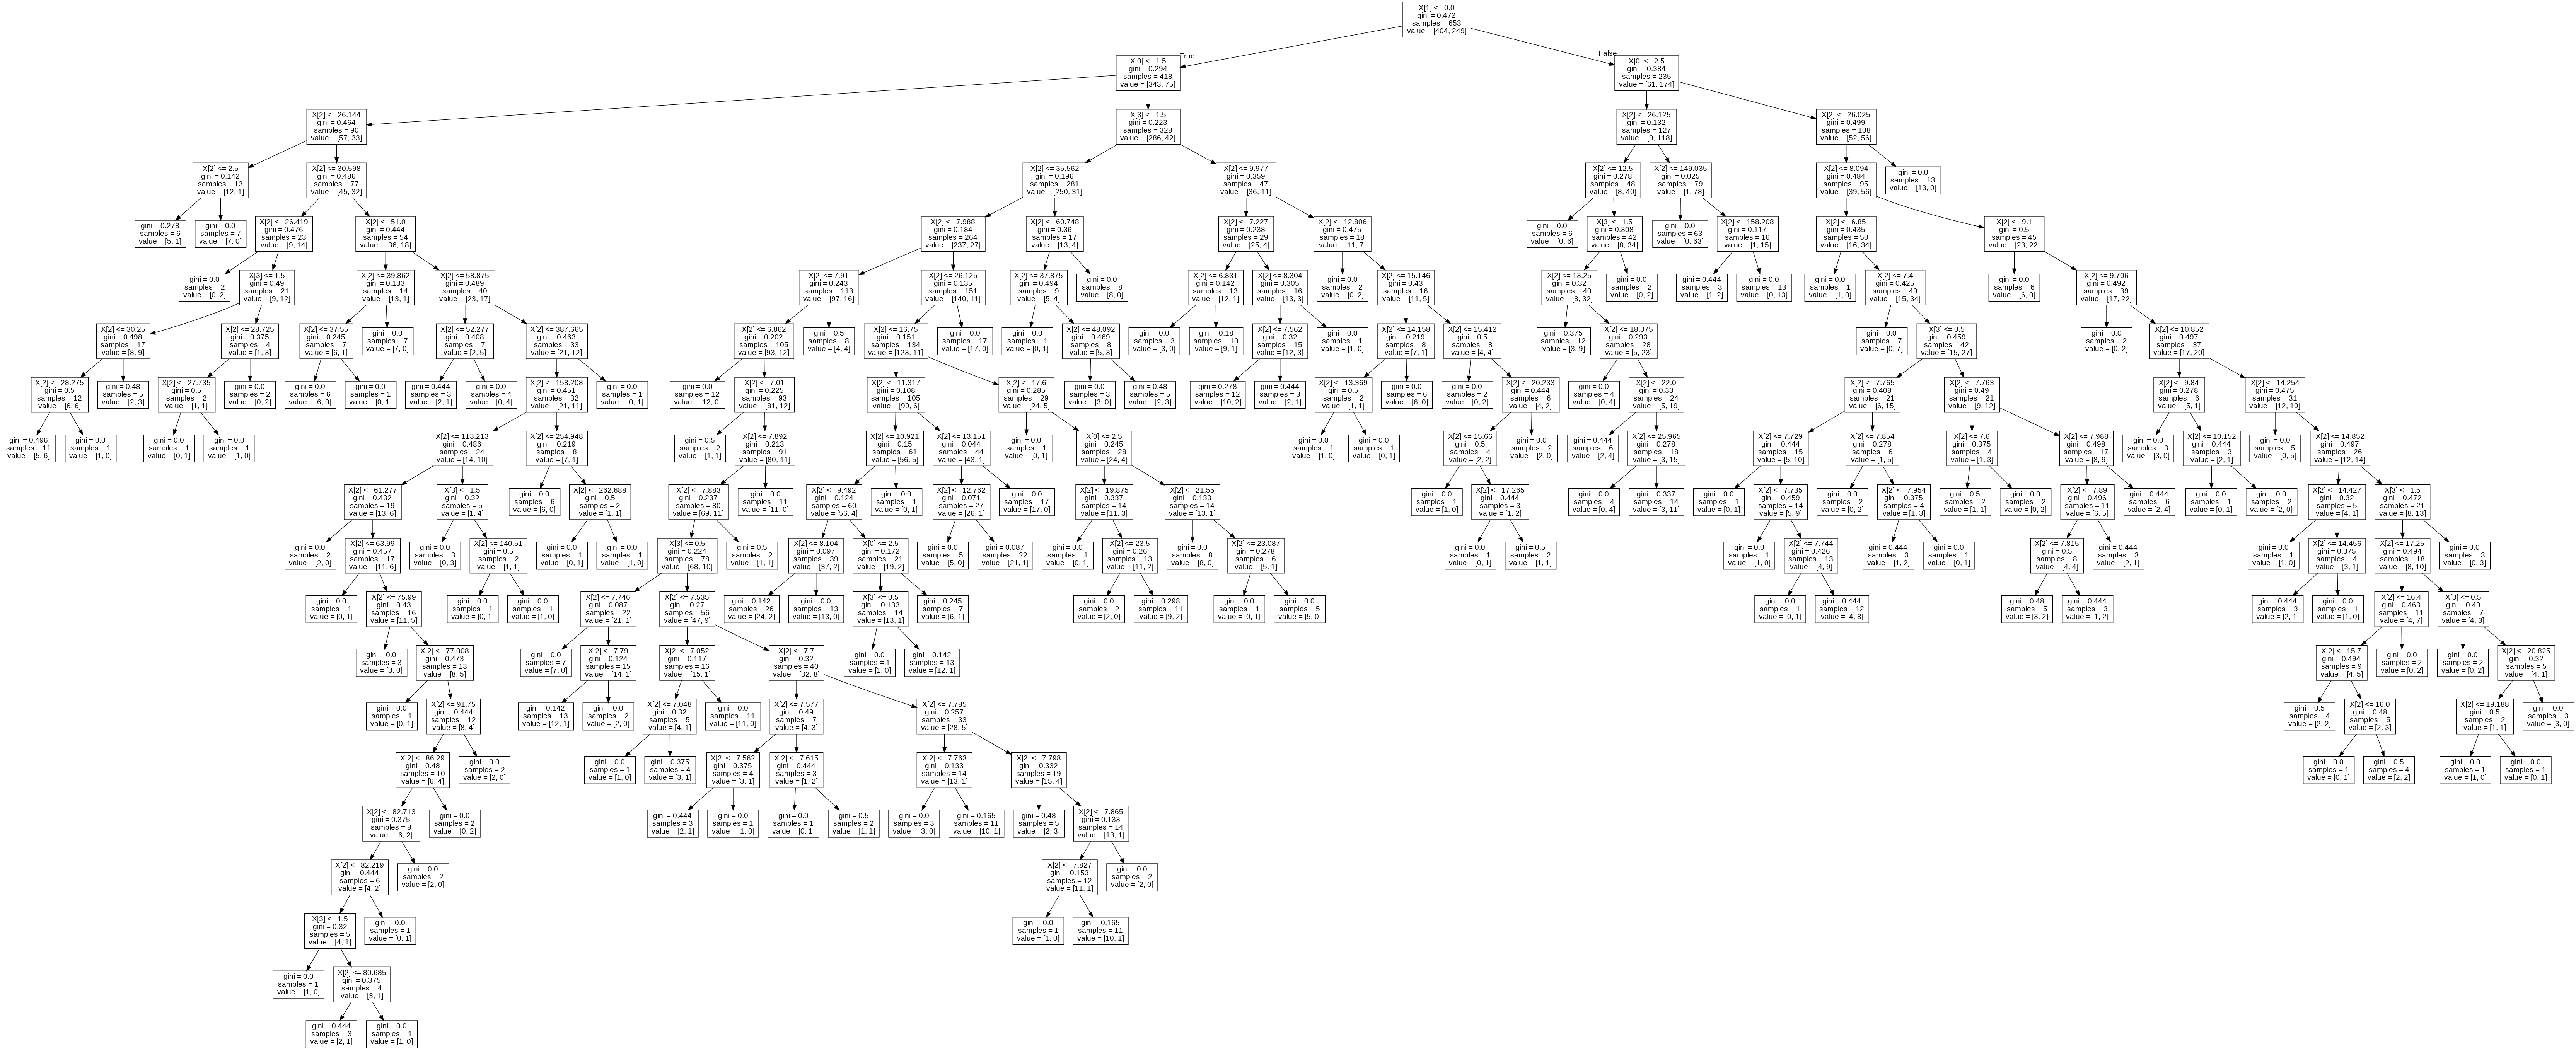

In [62]:
from sklearn.tree import export_graphviz
# Save the DOT file as tree.dot
export_graphviz( classifier ,
                 out_file="tree.dot"
                 )

# Convert DOT file to PNG
!dot -Tpng tree.dot -o tree.png

#from subprocess import check_call
#check_call(['dot','-Tpng',"tree.dot",'-o',"tree.png"])

# Display the resulting PNG file
from IPython.display import Image
Image('tree.png')

## Part 2: Random Forest Classifier

                 precision    recall  f1-score   support

Did not survive       0.81      0.81      0.81       405
       Survived       0.69      0.70      0.69       249

       accuracy                           0.77       654
      macro avg       0.75      0.75      0.75       654
   weighted avg       0.77      0.77      0.77       654



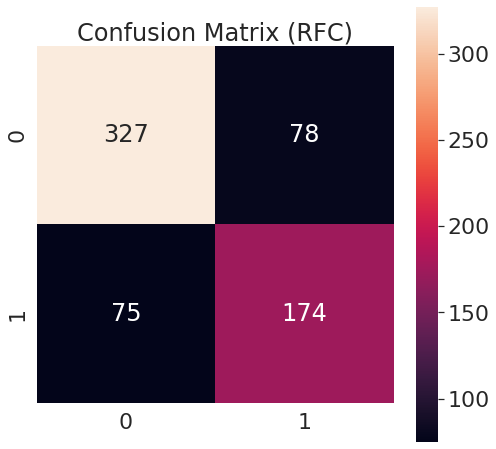

<Figure size 432x288 with 0 Axes>

In [63]:
''' build, train, and test a RFC model '''

# create model
classifier = RandomForestClassifier(n_estimators=100)

# train model
classifier.fit(X_train, Y_train)

# test model
Y_pred = classifier.predict(X_test)

# print classification report
print(classification_report(Y_test,
                            Y_pred,
                            target_names=['Did not survive', 'Survived']))

# plot confusion matrix
confMatrix = confusion_matrix(Y_test,
                              Y_pred)

df_cm = pd.DataFrame(confMatrix)

plt.figure(figsize=(8,8))
sns.set(font_scale=2)
sns.heatmap(df_cm, annot=True, square=True, fmt="d")
plt.title("Confusion Matrix (RFC)")
plt.show()
plt.clf()

# Conclusions
In conclusion, more time was spent on the data processing than was required, and I tried to reduce the clutter in that section as much as possible. Code cells with expansive output were commented out to avoide triggering a clutter. Uncomment if you would like to see the full verbose output.

We started with **1309 rows and 14 columns total, 7 of which were non-numerical, and 7 of which were between 20% and 90% percent null**. We extraolated, cleaned, encoded the dataest to endup with a dataset of **1307 rows and 11 columns (including the target column) where all columns were numerical, and all are non-null.**

After the dta processing (extrapolating, cleanning, encoding..), we took a look at the correlation of each of the columns we had left and the survived column, and at the end I decided to go with features that had at least a correlation score of 0.1 (or 10%) to our target class, `survived`. Those were, `pclass`, `sex`, `fare`, and `embarked`.

We proccedded to split out full dataset into a training and testing sub-datasets. The same subsets were used for both classification models. Each subsets made up 50% of the full dataset.

Next, we built, trained, and tested borh of our classification models Decision Tree Classification model (DTC) and Random Forest Classification (RFC) model.

Our Decision Tree Classification (DTC) model had an accuracy score of **78%**. The model predicted **82%** of the passangers that did not survive correctly, and **70%** of the passangers that survived correctly. 

Our Random Forest Classification (RFC) model had an accuracy score of **77%**. The model predicted **81%** of the passangers that did not survive correctly, and **69%** of the passangers that survived correctly. 

For both models, it's clear that the models are more accurate at predicting those who did not survive, than those who survived. This could be caused by the fact that the full dataset had a bias towrds those who did not survive (i.e., the full dataset, post processing, had only about ~38% datapoints of passangers that survived.

Overall, the results found here are in line with what was found using a Logisitic Regression Binary Classification Model. In fact, slightly better.

Finally, one way to improve this model would be to utilize grid search to tune the each of the models' hyperparameters, and experiment further into the data pre-processing stage. In that order, based on potential ROI.